## 1 - IMPORTATION DES PACKAGES NECESSAIRE dans le project

In [581]:
import pandas as pd
import sklearn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
## import plotly.express as px
import seaborn as sns
from ipywidgets import widgets
from datetime import datetime, date, time
import csv

## 2 - IMPORTATION OF DATA FOR CREATING DATAFRAME 

In [582]:
bookrate_df = pd.read_csv(r"C:\Users\Utilisateur\Desktop\Warm Up\Machine Learning labs\GROUPE_14\books.csv", index_col ="bookID")
bookrate_df 

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


## 3 - DATA ANALYSIS AND FEATURE SELECTING

#### a) Verification du type de chaque attribut de notre dataframe

  Ceci pour avoir un premier appercu des données numerique qui seront potentillement utile pour notre MODEL

In [583]:
bookrate_df.dtypes

title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

#### recherche des Missing values 
Pour savoir quel potentiel transformation nous aurons à faire plutard des ligne vide
dans notre cas nous n'avons pas de MISSING VALUES ceci est en partie due au fait que nous avons fait une petite transformation manuel sur 4 lignes **(avec les bookID : 12224, 16914, 22128, 34889)** de notre DATAFRAME

In [584]:
bookrate_df.isna().sum()

title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

#### Verification of the number of columns

In [585]:
bookrate_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

#### Verification of the number of indexs

In [586]:
bookrate_df.index

Index([    1,     2,     4,     5,     8,     9,    10,    12,    13,    14,
       ...
       45617, 45623, 45625, 45626, 45630, 45631, 45633, 45634, 45639, 45641],
      dtype='int64', name='bookID', length=11127)

#### Verification of unique values by Columns 
This can be helpful to see how which attribute can be categorize or group by intervalle

In [587]:

bookrate_df.nunique()

title                 10352
authors                6643
average_rating          209
isbn                  11127
isbn13                11127
language_code            27
  num_pages             997
ratings_count          5294
text_reviews_count     1822
publication_date       3679
publisher              2292
dtype: int64

#### Analysis of all the numerical value
To globally explore and see some information like outliers , BIAS or other useful information

In [627]:
bookrate_df.describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11076.0,1.107600e+04,11076.0,11076.0,11076.0
mean,4.0,9.759789e+12,337.0,18019.0,544.0
std,0.0,4.439126e+11,241.0,112732.0,2582.0
min,1.0,8.987060e+09,0.0,0.0,0.0
25%,4.0,9.780345e+12,194.0,108.0,9.0
50%,4.0,9.780575e+12,300.0,756.0,47.0
75%,4.0,9.780872e+12,416.0,5032.0,240.0
max,5.0,9.790008e+12,6576.0,4597666.0,94265.0


#### Analysis of all the categorical value

In [589]:
bookrate_df.describe(include ="O")

,title,authors,isbn,language_code,publication_date,publisher
count,11127,11127,11127,11127,11127,11127
unique,10352,6643,11127,27,3679,2292
top,The Brothers Karamazov,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,8911,56,318


Here we can see the global observation of average rating can tell us that most of the books are well note. And we are going to study more About the average rating

##### Average_rating exploration

###### . Find the the distribution of average_rating 

<Axes: xlabel='average_rating', ylabel='Count'>

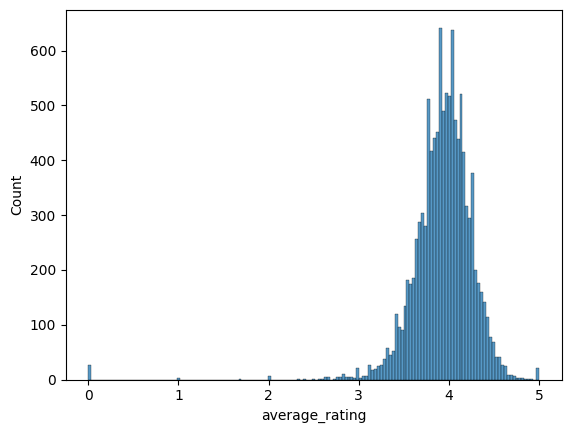

In [590]:
sns.histplot(data=bookrate_df,x="average_rating")

En visualisant de pret l'histograme de distribution des average_rating nous constatons que les données sont concentré entre 3 et umpeu moin de 5 donc quel que soit le model de machine learning utilisé il sera bon pour designer **les livre bien noté ou qui auron des notes superieur à 3**. nous pouvons donc essayer de creer un algorithme qui nous permetra de dire si un livre est bien noté ou mal noté . en se basant sur la moyens des notes. ceci car nous vous avoir une distribution equitable entre les categories. " average rating inferieur à 3.8 = MOYEN et average rating superieur à 3.8 = BON.
Ou créer un algorithme de regression Linéaire.

Nous considérons MOYEN et BON car notre data set nous montre qu'il ya très peut de livre avec des note inferieur à 3 que nous considerons comme etant le seuil pour definir qu'un livre est moyen ou bon.

**We decided to study the max (average_rating=5) and min (average_rating=0) value of the scores to have more information on this distribution of notes contained between 3 and 5**

In [591]:
bookrate0_df = bookrate_df.loc[bookrate_df.average_rating == 0 ]
bookrate5_df = bookrate_df.loc[bookrate_df.average_rating == 5 ]
bookrate0_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet
1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames
3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books
9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan
15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc
16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge


In [592]:
bookrate5_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA
2560,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,382960226X,9783829602266,eng,83,1,0,9/1/2006,Schirmer Mosel
2843,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,0439271711,9780439271714,eng,32,4,1,1/1/2002,Teaching Resources
4287,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,0738511676,9780738511672,eng,128,2,0,3/17/2003,Arcadia Publishing
14741,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,0744002354,9780744002355,eng,128,2,0,3/6/2003,BradyGames
17224,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,1890995525,9781890995522,eng,74,5,3,2/1/2006,Square One Publishers
17830,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,0533017424,9780533017423,eng,202,4,0,1/1/1975,Vantage Press
18184,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,0851621813,9780851621814,eng,96,1,0,6/1/2004,Boosey & Hawkes Inc
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio


In [593]:
bookrate5_df["ratings_count"].describe()

count    22.000000
mean      1.727273
std       1.315903
min       0.000000
25%       1.000000
50%       1.500000
75%       2.000000
max       5.000000
Name: ratings_count, dtype: float64

   ###### Observation
   After studying our extremum we notice that: 
- We have **"26 books with average rating = 0"** and **"22 books with average rating = 5"**
- **Books with a rating of 0** almost all have no text review and rating counts. this can be explained by the fact that these different books have never been read by any reader or, less likely for us, the information in these books has not been found. 
- **Books with a rating of 5** almost all have **rating counts** less than or equal to 5, perhaps because the books have not been read by many readers or for other reasons that we don't know. we also noticed that the **texts reviews** were all less than or equal to zero which can be normal because not all readers who vote are obliged to leave a comment.
- After studying the rating of 5 we noticed that they exists the book who have author's Name **NOT A BOOK** and we decide to observe more about this kind of authors

##### finding Autors who have th name NOT A BOOK

In [594]:
bookrate_dfNAB = bookrate_df[bookrate_df.authors == "NOT A BOOK"] 
bookrate_dfNAB

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
3593,Murder by Moonlight & Other Mysteries (New Adv...,NOT A BOOK,4.00,0743564677,9780743564670,eng,0,7,2,10/3/2006,Simon Schuster Audio
3599,The Unfortunate Tobacconist & Other Mysteries ...,NOT A BOOK,3.50,074353395X,9780743533959,eng,0,12,1,10/1/2003,Simon & Schuster Audio
19786,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.00,0563388692,9780563388692,eng,2,3,0,4/1/1996,BBC Physical Audio
19787,The Goon Show: Moriarty Where Are You?,NOT A BOOK,4.43,0563388544,9780563388548,eng,2,0,0,3/30/2005,BBC Physical Audio
19788,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.00,0563388323,9780563388326,eng,2,2,0,10/2/1995,BBC Physical Audio


 We decide finally after all these observations **to remove all the book who have Average_rating equal to 5 and O of our Dataframe**. Because for us these are outliers which can disturb our Model and given their number (48) we think they could be forget. 
    **We also decided to remove all the 5 books who have "NOT A BOOK"as author names because they are not considered as a books.**

###### Deletion of lines with "0" and "5" as Average_Rating and lines with authors names "NOT A BOOK"

In [597]:
bookrate1_df = bookrate_df.loc[bookrate_df.average_rating < 5] #deletion of the "5" average_rating books
bookrate1_df = bookrate_df.loc[bookrate_df.average_rating > 0] #deletion of the "0" average_rating books
bookrate1_df = bookrate_df.loc[bookrate_df.authors != "NOT A BOOK"] #deletion of the "NOT A BOOK" authors books
bookrate1_df.describe().round(3) # vericication of the delation of "0" and "5"


,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11076.000,1.107600e+04,11076.000,11076.000,11076.000
mean,3.941,9.759789e+12,337.057,18018.993,544.348
std,0.293,4.439126e+11,241.233,112731.526,2581.839
min,1.000,8.987060e+09,0.000,0.000,0.000
25%,3.770,9.780345e+12,194.000,108.000,9.000
50%,3.960,9.780575e+12,300.000,755.500,47.000
75%,4.130,9.780872e+12,416.000,5032.500,240.000
max,4.910,9.790008e+12,6576.000,4597666.000,94265.000


In [598]:
bookrate1_df[bookrate1_df.average_rating == 5]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


In [599]:
bookrate1_df[bookrate1_df.authors == "NOT A BOOK"] # vericication of the delation of authors "NOT A BOOK"

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,


We can therefore find out if the average ratings have correlations with other numerical data in our descriptive tables 

### - Average_rating and Num_pages
   First of all first of all After several tries without success we were forced to make a modification on the columns to prevent the spaces between the columns from creating errors of understanding in python especially at the plotting level

In [600]:
bookrate1_df.columns = bookrate1_df.columns.str.strip()

<Axes: xlabel='average_rating', ylabel='num_pages'>

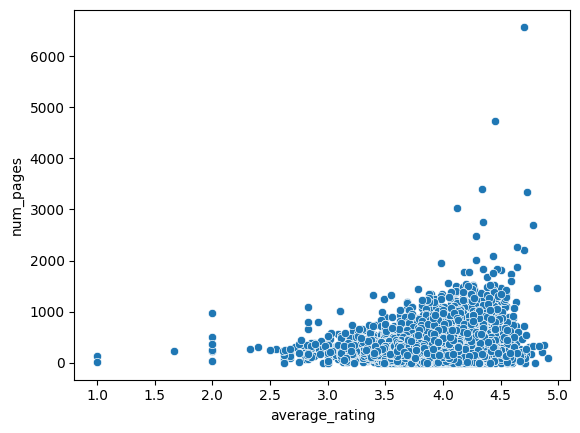

In [601]:
sns.scatterplot(data=bookrate1_df,x="average_rating", y="num_pages")

- We can see a big problem here because we notice a lot of books that have **0 pages** but have high rating averages. This creates a big misunderstanding at our level and we decide to see all the information related to these books. To decide later whether they are useful in our algorithm or not.
- We see some books which have a huge number of pages more than 2000 pages 

-- **Book who have 0 as Numbers of pages**

In [602]:
bookrate1_df[bookrate1_df.num_pages == 0]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
955,The 5 Love Languages / The 5 Love Languages Jo...,Gary Chapman,4.70,0802415318,9780802415318,eng,0,22,4,1/1/2005,Moody Publishers
2835,The Tragedy of Pudd'nhead Wilson,Mark Twain/Michael Prichard,3.79,140015068X,9781400150687,eng,0,3,0,1/1/2003,Tantor Media
4249,The Da Vinci Code (Robert Langdon #2),Dan Brown/Paul Michael,3.84,0739339788,9780739339787,eng,0,91,16,3/28/2006,Random House Audio
5362,The Summons / The Brethren,John Grisham/Michael Beck/Frank Muller,3.99,0739342770,9780739342770,eng,0,241,9,10/10/2006,Random House Audio
6542,The Patricia Cornwell CD Audio Treasury: All T...,Patricia Cornwell/Kate Burton,4.16,0060791217,9780060791216,eng,0,202,1,7/26/2005,HarperAudio
...,...,...,...,...,...,...,...,...,...,...,...
40378,The Chessmen of Mars (Barsoom #5),Edgar Rice Burroughs/John Bolen,3.83,1400130212,9781400130214,eng,0,5147,157,1/1/2005,Tantor Media
41273,Fine Lines (One-Eyed Mack #6),Jim Lehrer,3.23,0517164353,9780517164358,eng,0,17,4,11/19/1995,Random House Value Publishing
43343,Stowaway and Milk Run: Two Unabridged Stories ...,Mary Higgins Clark/Jan Maxwell,3.49,0671046241,9780671046248,eng,0,64,2,12/1/1999,Simon & Schuster Audio


-- **Book who have less than 30 Numbers of pages**

In [603]:
bookrate1_df[bookrate1_df.num_pages < 30].describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,298.000000,2.980000e+02,298.000000,298.000000,298.000000
mean,3.979732,9.781027e+12,7.808725,1201.332215,43.449664
std,0.355779,1.007294e+09,7.636545,5373.735305,133.553578
min,1.000000,9.780060e+12,0.000000,0.000000,0.000000
25%,3.822500,9.780564e+12,1.000000,18.000000,2.000000
50%,4.000000,9.780754e+12,6.000000,55.500000,7.000000
75%,4.197500,9.781562e+12,12.750000,134.500000,23.750000
max,4.800000,9.789626e+12,29.000000,64395.000000,1617.000000


-- **Book who have more than 2000  pages**

In [604]:
bookrate1_df[bookrate1_df.num_pages > 2000].num_pages

bookID
8        2690
10       3342
3579     2088
20749    2198
23589    2264
24520    6576
25587    4736
25709    3020
30258    2751
40012    2021
43888    2480
44613    3400
Name: num_pages, dtype: int64

**At the end of the exploration of the Numbers of pages bases on the average rating we decide to :**
   - Affect to the books who have the numbers of pages less than 30 to affect them the number 30 because we have suppose that a book with a relevant number of pages must have a minimum of 30 pages. firstly we think about replace all of them by the mean of number of pages. But for us it seemed illogical to replace a number of pages lower than 30 by a number of pages of more than 330
   - to use most of the Books who have more than 2000 pages in our modelling just because  they are a symbolic books for us even if they can be a outliers. we have just remove the 2 big one with respectively **"6576"** and **"4736"**

**Affecting books who have less than 30 Pages the number of Pages 30**

In [605]:
bookrate1_df.loc[bookrate1_df["num_pages"] < 30, "num_pages"] = 30
#bookrate1_df.loc[bookrate1_df["num_pages"] < 30, "num_pages"] = bookrate1_df.num_pages.mean().round()

In [606]:
bookrate1_df["num_pages"].describe()

count    11076.000000
mean       337.653575
std        240.440628
min         30.000000
25%        194.000000
50%        300.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

In [607]:
 bookrate1_df= bookrate1_df[bookrate1_df.num_pages < 4000]

In [608]:
bookrate1_df["num_pages"].describe()

count    11074.000000
mean       336.693065
std        229.258696
min         30.000000
25%        194.000000
50%        300.000000
75%        416.000000
max       3400.000000
Name: num_pages, dtype: float64

### - Average_rating with rating_counts and text review counts



<Axes: xlabel='average_rating', ylabel='text_reviews_count'>

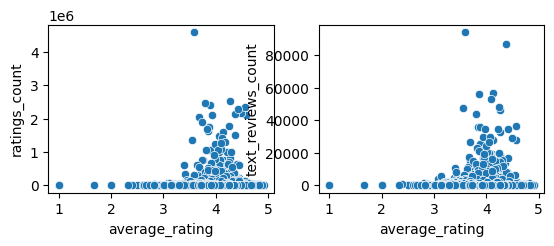

In [609]:
plt.subplot(2,2,1)
sns.scatterplot(data=bookrate1_df,x="average_rating", y="ratings_count")
plt.subplot(2,2,2)
sns.scatterplot(data=bookrate1_df,x="average_rating", y="text_reviews_count")


<Axes: xlabel='average_rating', ylabel='ratings_count'>

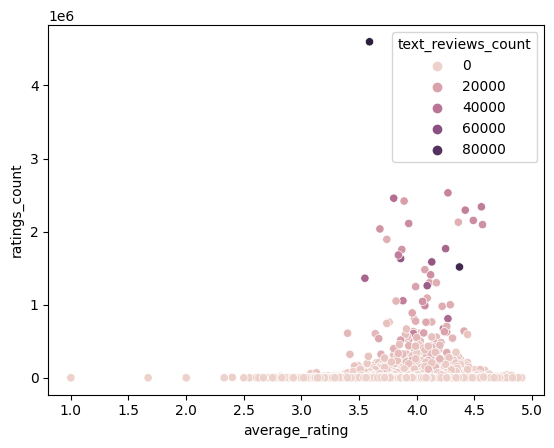

In [610]:
sns.scatterplot(data=bookrate1_df,x="average_rating",y="ratings_count",hue= "text_reviews_count")

<Axes: xlabel='text_reviews_count'>

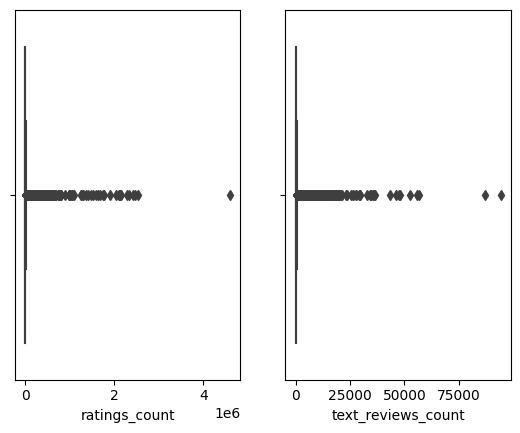

In [396]:
plt.subplot(1,2,1)
sns.boxplot(data=bookrate1_df, x="ratings_count")
plt.subplot(1,2,2)
sns.boxplot(data=bookrate1_df, x="text_reviews_count")

After the different plotting we can see that we have 
 - We have a lot of books who have **"0"** as rating count may because the book was not interresting for the readers . But All of them have the Average rating more or egal than 2 which is illogical.
 - We have a lot of books who have **"0"** as text_reviews_count may because reader didn't have the time to make leurs opinions about the book. this can be explained by many reason.
 - We also see some outliers which can have a bag effect to our model

**Observation of book with "0" rating count and "0" text reviews counts**

In [611]:
dff=bookrate1_df[bookrate1_df.ratings_count == 0]
dff.describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,51.000,5.100000e+01,51.000,51.0,51.00
mean,3.808,9.781644e+12,325.549,0.0,0.02
std,0.484,2.315919e+09,290.868,0.0,0.14
min,2.000,9.780061e+12,30.000,0.0,0.00
25%,3.580,9.780386e+12,64.000,0.0,0.00
50%,3.850,9.780788e+12,285.000,0.0,0.00
75%,4.120,9.781736e+12,462.500,0.0,0.00
max,4.780,9.789812e+12,1088.000,0.0,1.00


In [612]:
 bookrate1_df[bookrate1_df.text_reviews_count == 0].describe().round(3)


,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,583.000,5.830000e+02,583.000,583.000,583.0
mean,3.890,9.732914e+12,276.149,10.407,0.0
std,0.449,6.799948e+11,224.210,14.128,0.0
min,1.000,4.908601e+10,30.000,0.000,0.0
25%,3.700,9.780522e+12,124.000,2.000,0.0
50%,3.940,9.780814e+12,238.000,6.000,0.0
75%,4.140,9.781860e+12,376.000,13.000,0.0
max,4.880,9.789861e+12,2264.000,134.000,0.0


In [613]:
dff[dff.text_reviews_count == 0].describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,50.000000,5.000000e+01,50.000000,50.0,50.0
mean,3.813000,9.781507e+12,321.500000,0.0,0.0
std,0.487376,2.120265e+09,292.365947,0.0,0.0
min,2.000000,9.780061e+12,30.000000,0.0,0.0
25%,3.585000,9.780381e+12,64.000000,0.0,0.0
50%,3.865000,9.780769e+12,274.500000,0.0,0.0
75%,4.125000,9.781593e+12,427.250000,0.0,0.0
max,4.780000,9.789812e+12,1088.000000,0.0,0.0


**Observation of  rating count and text reviews counts Outliers**

In [842]:
# Rating counts
bookrate1_df[bookrate1_df.ratings_count > 1000000]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_age
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,17.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,19.0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,19.0
34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,2003-09-05,Houghton Mifflin Harcourt,20.0
865,The Alchemist,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.86,0061122416,9780061122415,eng,197,1631221,55843,1993-05-01,HarperCollins,30.0
890,Of Mice and Men,John Steinbeck,3.87,0142000671,9780142000670,eng,103,1755253,25554,2002-01-08,Penguin Books,21.0
930,Memoirs of a Geisha,Arthur Golden,4.11,0739326228,9780739326220,eng,434,1301083,19296,2005-11-15,Random House Large Print Publishing,18.0
960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9781416524793,eng,736,2418736,21303,2006-04-01,Pocket Books,17.0
968,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.84,0307277674,9780307277671,eng,489,1679706,35877,2006-03-28,Anchor,17.0


In [615]:
#text_Values count
bookrate1_df[bookrate1_df.text_reviews_count > 50000].describe().round(3)

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,5.000,5.000000e+00,5.00,5.000,5.000
mean,4.008,9.780541e+12,358.60,2118174.000,69270.400
std,0.295,5.876058e+08,163.58,1393488.296,19673.728
min,3.590,9.780061e+12,197.00,1260027.000,52759.000
25%,3.860,9.780316e+12,208.00,1516367.000,55843.000
50%,4.090,9.780376e+12,335.00,1585589.000,56604.000
75%,4.130,9.780386e+12,501.00,1631221.000,86881.000
max,4.370,9.781565e+12,552.00,4597666.000,94265.000


After analysing the rating count we decide 
- To remove the 0 rating count which have the average rating because we didn't undersand the problem who can make this kind of non sense we also decide it because the major part of them **(50 out of 54)** also have "0"as text review count.
- To not remove the 5 value text review more than **"50.000"** or rating count more than **"1000.000"** even if they can be a outliers values.

### - Average_rating and Non-Numerical value

**Average_rating and Date**
we are going to transform the format of the Date to make it more usable

In [616]:
bookrate1_df['publication_date'] = pd.to_datetime(bookrate1_df['publication_date'], format='%m/%d/%Y', errors='coerce')

In [617]:
bookrate1_df.publication_date.dt.year.shape

(11074,)

In [618]:
bookrate1_date = bookrate1_df.publication_date.dt.year
bookrate1_date.describe()

count    11072.000000
mean      2000.184158
std          8.213139
min       1900.000000
25%       1998.000000
50%       2003.000000
75%       2005.000000
max       2020.000000
Name: publication_date, dtype: float64

In [619]:
book_age = 2023 - bookrate1_date
book_age.describe()

count    11072.000000
mean        22.815842
std          8.213139
min          3.000000
25%         18.000000
50%         20.000000
75%         25.000000
max        123.000000
Name: publication_date, dtype: float64

In [620]:
# bookrate1_df = bookrate1_df + book_age

bookrate1_df["book_age"] = book_age

In [621]:
print(bookrate1_df.shape)
#bookrate1_df.drop(columns=["publication_date"]).describe()
bookrate1_df

(11074, 12)


,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_age
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,17.0
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,19.0
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,20.0
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,19.0
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,2004-12-21,Da Capo Press,19.0
45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,1988-12-01,Penguin Books,35.0
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,1993-08-01,Penguin Books,30.0


In [622]:
bookrate1_df.loc[bookrate1_df.book_age.isna(),:]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_age
bookID,,,,,,,,,,,,
31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,NaT,Bantam Books,NaN
45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,NaT,Folio histoire,NaN


In [628]:
#bookrate1_df =bookrate1_df.drop(index=bookrate1_df.loc[bookrate1_df.publication_date.isna(),:].index)
bookrate1_df.loc[bookrate1_df.book_age.isna(), "book_age"] = book_age.mean().round(0)

In [632]:
bookrate1_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,book_age
count,11074.000000,1.107400e+04,11074.000000,1.107400e+04,11074.000000,11072,11074.000000
mean,3.940620,9.759786e+12,336.693065,1.802199e+04,544.430468,2000-09-03 01:55:52.890173440,22.815875
min,1.000000,8.987060e+09,30.000000,0.000000e+00,0.000000,1900-01-01 00:00:00,3.000000
25%,3.770000,9.780345e+12,194.000000,1.080000e+02,9.000000,1998-07-31 12:00:00,18.000000
50%,3.960000,9.780575e+12,300.000000,7.550000e+02,47.000000,2003-03-01 00:00:00,20.000000
75%,4.130000,9.780872e+12,416.000000,5.033500e+03,240.000000,2005-10-01 00:00:00,25.000000
max,4.910000,9.790008e+12,3400.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00,123.000000
std,0.293351,4.439526e+11,229.258696,1.127415e+05,2582.064526,NaN,8.212397


In [675]:
print(bookrate1_df.shape)
bookrate2_df=bookrate1_df.drop(columns=["publication_date"])
print(bookrate2_df.shape)

(11074, 12)
(11074, 11)


In [676]:
bookrate2_df.describe()

,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,book_age
count,11074.000000,1.107400e+04,11074.000000,1.107400e+04,11074.000000,11074.000000
mean,3.940620,9.759786e+12,336.693065,1.802199e+04,544.430468,22.815875
std,0.293351,4.439526e+11,229.258696,1.127415e+05,2582.064526,8.212397
min,1.000000,8.987060e+09,30.000000,0.000000e+00,0.000000,3.000000
25%,3.770000,9.780345e+12,194.000000,1.080000e+02,9.000000,18.000000
50%,3.960000,9.780575e+12,300.000000,7.550000e+02,47.000000,20.000000
75%,4.130000,9.780872e+12,416.000000,5.033500e+03,240.000000,25.000000
max,4.910000,9.790008e+12,3400.000000,4.597666e+06,94265.000000,123.000000


In [638]:
from sklearn.model_selection import train_test_split


In [677]:
df_train, df_test= train_test_split(bookrate2_df, test_size=0.2)

In [678]:
df_train

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publisher,book_age
bookID,,,,,,,,,,,
11027,No me cogeréis vivo: artículos 2001-2005,Arturo Pérez-Reverte,4.16,8420469432,9788420469430,spa,537,199,5,Alfaguara,18.0
24345,Sachs & Violens,Peter David/George Pérez,3.26,1401210503,9781401210502,en-US,128,66,9,DC Comics,17.0
30036,Elric of Melniboné (The Elric Saga #1),Michael Moorcock,3.89,0441203981,9780441203987,eng,181,20559,682,Ace Books,36.0
13066,Sick Puppy,Carl Hiaasen,3.89,0446695688,9780446695688,eng,464,20070,1047,Grand Central Publishing,18.0
7987,The Legend of Luke (Redwall #12),Brian Jacques,4.00,0142501093,9780142501092,eng,374,14205,144,Firebird,18.0
...,...,...,...,...,...,...,...,...,...,...,...
23878,Chronicle of a Death Foretold,Gabriel García Márquez/Gregory Rabassa,3.97,140003471X,9781400034710,eng,120,69912,2789,Vintage,20.0
13173,A Little Prairie House,Laura Ingalls Wilder/Renée Graef,4.19,0064435261,9780064435260,eng,32,1561,45,HarperCollins,24.0
35120,Star Trek: Logs One and Two (Star Trek: Log #...,Alan Dean Foster,3.46,0345495810,9780345495815,eng,370,58,4,Del Rey Books,17.0


In [679]:
len(bookrate1_df)

11074

In [680]:
len(df_train)

8859

In [681]:
len(df_test)

2215

#### visualizing the different mean of rating count and printing them

In [682]:
print(bookrate2_df.num_pages.mean())
print(df_train.num_pages.mean())
print(df_test.num_pages.mean())

336.6930648365541
336.0390563268992
339.30880361173814


#### visualizing the means of the different average rating and printing them

In [683]:
print(bookrate2_df.average_rating.mean())
print(df_train.average_rating.mean())
print(df_test.average_rating.mean())

3.9406203720426225
3.9421221356812284
3.934613995485327


In [836]:
X_train=df_train.loc[:,[ 'ratings_count','num_pages','text_reviews_count',"book_age"]].values

In [837]:
X_train

array([[1.9900e+02, 5.3700e+02, 5.0000e+00, 1.8000e+01],
       [6.6000e+01, 1.2800e+02, 9.0000e+00, 1.7000e+01],
       [2.0559e+04, 1.8100e+02, 6.8200e+02, 3.6000e+01],
       ...,
       [5.8000e+01, 3.7000e+02, 4.0000e+00, 1.7000e+01],
       [3.6800e+02, 4.4100e+02, 4.4000e+01, 4.4000e+01],
       [6.9800e+03, 4.8000e+02, 2.2900e+02, 1.8000e+01]])

In [733]:
y_train=df_train.average_rating.values

In [838]:
y_train

array([4.16, 3.26, 3.89, ..., 3.46, 3.92, 4.01])

In [651]:
from sklearn import preprocessing
from sklearn import utils

In [438]:
lab_enc = preprocessing.LabelEncoder()
X_train_encoded0 = lab_enc.fit_transform(X_train[:,0])

X_train_encoded1 = lab_enc.fit_transform(X_train[:,1])
X_train_encoded2 = lab_enc.fit_transform(X_train[:,2])
y_train_encoded = lab_enc.fit_transform(y_train)



In [439]:
X_train_encoded=np.vstack((X_train_encoded0,X_train_encoded1,X_train_encoded2)).T
X_train_encoded
len(X_train_encoded)

8859

In [440]:
print(X_train_encoded)

[[  94  174   10]
 [ 416  173   47]
 [1542  334   47]
 ...
 [2982  325  580]
 [ 240  254   16]
 [  21    9    1]]


In [688]:
print(X_train)

[[  199   537     5]
 [   66   128     9]
 [20559   181   682]
 ...
 [   58   370     4]
 [  368   441    44]
 [ 6980   480   229]]


In [735]:
X_test=df_test.loc[:,[ 'ratings_count','num_pages','text_reviews_count',"book_age"]].values

In [736]:
y_test=df_test.average_rating.values

In [444]:
y_test_encoded = lab_enc.fit_transform(y_test)

In [691]:
from sklearn.ensemble import RandomForestRegressor

In [737]:
rf_model = RandomForestRegressor()

In [738]:
rf_model.fit(X=X_train, y=y_train)

RandomForestRegressor()

In [739]:
y_test_predicted_rf=rf_model.predict(X_test)

In [740]:
y_test_predicted_rf

array([4.1351 , 4.09225, 4.0938 , ..., 4.0067 , 3.61   , 3.8322 ])

In [742]:
#y_train
y_test

array([3.77, 3.96, 3.97, ..., 3.87, 3.85, 3.81])

In [743]:
((y_test_predicted_rf==y_test).sum())/len(y_test)

0.0

#### compare the difference between predict and exist average rating

In [758]:
bookrate2_predict = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_rf.tolist()})
bookrate2_predict['Dif_obrserv'] = (bookrate2_predict["rate_test"] - bookrate2_predict["predict"])
abs(bookrate2_predict.head(15))

,rate_test,predict,Dif_obrserv
0,3.77,4.13510,0.36510
1,3.96,4.09225,0.13225
2,3.97,4.09380,0.12380
3,3.42,3.79700,0.37700
4,4.07,4.06060,0.00940
5,4.29,3.95060,0.33940
6,3.92,4.12720,0.20720
7,4.16,4.05750,0.10250
8,3.84,4.02650,0.18650
9,3.89,3.98820,0.09820


<Axes: >

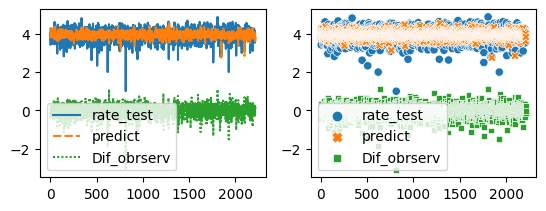

In [793]:
plt.subplot(2,2,1)
sns.lineplot(data=bookrate2_predict)
plt.subplot(2,2,2)
sns.scatterplot(data=bookrate2_predict)

In [778]:
abs(bookrate2_predict).describe()

,rate_test,predict,Dif_obrserv
count,2215.000000,2215.000000,2215.000000
mean,3.934614,3.939170,0.220291
std,0.305026,0.140555,0.198745
min,1.000000,2.754100,0.000100
25%,3.780000,3.855550,0.081950
50%,3.960000,3.937400,0.173100
75%,4.130000,4.022450,0.304250
max,4.880000,4.552000,3.093807


#### Model accuracy and metrics

In [833]:
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error

print('Mean Absolute Error :', mean_absolute_error(y_pred = y_test_predicted_rf , y_true=y_test).round(2))
print('Mean Squared Error :', mean_squared_error(y_pred = y_test_predicted_rf , y_true=y_test).round(2))
print('Maximum Error :', max_error(y_pred = y_test_predicted_rf , y_true=y_test).round(2))

Mean Absolute Error : 0.22
Mean Squared Error : 0.09
Maximum Error : 3.09


### others Models

In [763]:
from sklearn.tree import DecisionTreeRegressor
dt_model =DecisionTreeRegressor()


In [764]:
dt_model.fit(X=X_train, y=y_train)

DecisionTreeRegressor()

In [770]:
y_test_predicted_dt=dt_model.predict(X_test)

In [771]:
y_test_predicted_dt

array([3.98, 3.69, 4.02, ..., 3.94, 3.11, 3.76])

In [772]:
y_test

array([3.77, 3.96, 3.97, ..., 3.87, 3.85, 3.81])

In [798]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict1 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_dt.tolist()})
bookrate2_predict1['Dif_obrserv'] = (bookrate2_predict1["rate_test"] - bookrate2_predict1["predict"])
abs(bookrate2_predict1.head(15))

,rate_test,predict,Dif_obrserv
0,3.77,3.98,0.21
1,3.96,3.69,0.27
2,3.97,4.02,0.05
3,3.42,3.90,0.48
4,4.07,4.08,0.01
5,4.29,3.98,0.31
6,3.92,4.01,0.09
7,4.16,3.95,0.21
8,3.84,3.51,0.33
9,3.89,4.00,0.11


In [799]:
abs(bookrate2_predict1).describe()

,rate_test,predict,Dif_obrserv
count,2215.000000,2215.000000,2215.000000
mean,3.934614,3.936752,0.305659
std,0.305026,0.309115,0.267856
min,1.000000,1.000000,0.000000
25%,3.780000,3.760000,0.110000
50%,3.960000,3.960000,0.240000
75%,4.130000,4.140000,0.430000
max,4.880000,4.860000,3.130000


<Axes: >

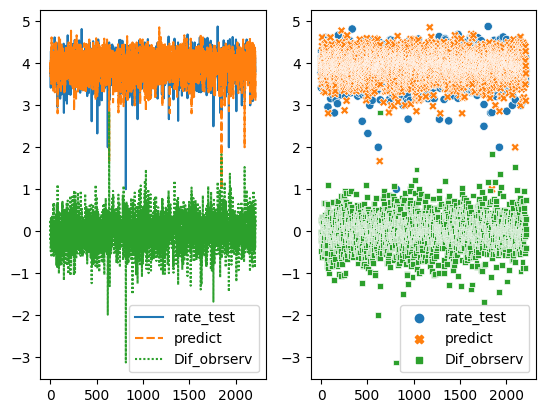

In [800]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict1)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict1)

In [834]:

print('Mean Absolute Error :', mean_absolute_error(y_pred = y_test_predicted_dt , y_true=y_test).round(2))
print('Mean Squared Error :', mean_squared_error(y_pred = y_test_predicted_dt , y_true=y_test).round(2))
print('Maximum Error :', max_error(y_pred = y_test_predicted_dt , y_true=y_test).round(2))

Mean Absolute Error : 0.31
Mean Squared Error : 0.17
Maximum Error : 3.13


### 2

In [826]:
from sklearn.linear_model import LinearRegression
lr_model =LinearRegression()

In [827]:
lr_model.fit(X=X_train, y=y_train)

LinearRegression()

In [828]:
y_test_predicted_lr=lr_model.predict(X_test)

In [829]:
y_test_predicted_lr

array([3.92866952, 3.90344507, 3.93996464, ..., 3.92343458, 4.07125874,
       3.88980193])

In [830]:
y_test

array([3.77, 3.96, 3.97, ..., 3.87, 3.85, 3.81])

In [784]:
((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)

0.0

In [841]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict2 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_lr.tolist()})
bookrate2_predict2['Dif_obrserv'] = (bookrate2_predict2["rate_test"] - bookrate2_predict2["predict"])
abs(bookrate2_predict2.head(15))

,rate_test,predict,Dif_obrserv
0,3.77,3.928670,0.158670
1,3.96,3.903445,0.056555
2,3.97,3.939965,0.030035
3,3.42,3.948795,0.528795
4,4.07,3.935748,0.134252
5,4.29,3.988274,0.301726
6,3.92,3.906132,0.013868
7,4.16,3.870241,0.289759
8,3.84,3.928508,0.088508
9,3.89,3.868901,0.021099


In [825]:
(bookrate2_predict2).describe()

,rate_test,predict,Dif_obrserv
count,2215.000000,2215.000000,2215.000000
mean,3.934614,3.942489,-0.007875
std,0.305026,0.050433,0.299682
min,1.000000,3.860554,-2.870255
25%,3.780000,3.910577,-0.167727
50%,3.960000,3.934744,0.012119
75%,4.130000,3.962671,0.182179
max,4.880000,4.326175,0.937025


<Axes: >

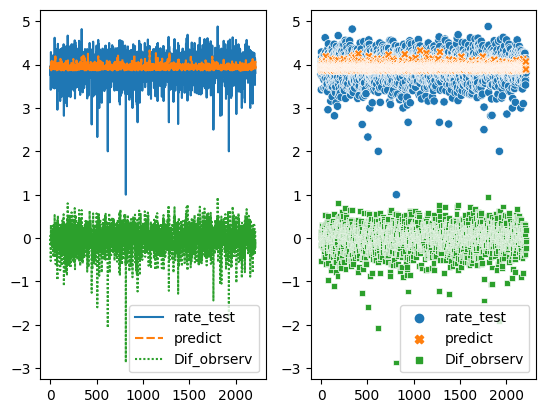

In [803]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict2)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict2)

In [835]:
print('Mean Absolute Error :', mean_absolute_error(y_pred = y_test_predicted_lr , y_true=y_test).round(2))
print('Mean Squared Error :', mean_squared_error(y_pred = y_test_predicted_lr , y_true=y_test).round(2))
print('Maximum Error :', max_error(y_pred = y_test_predicted_lr , y_true=y_test).round(2))

Mean Absolute Error : 0.22
Mean Squared Error : 0.09
Maximum Error : 2.87


# 3

In [840]:
from sklearn.neural_network import MLPRegressor
MLP_model =MLPRegressor()

In [822]:
MLP_model.fit(X=X_train, y=y_train)

MLPRegressor()

In [824]:
y_test_predicted_MLP=MLP_model.predict(X_test)
y_test_predicted_MLP

array([5.52204448, 3.51321346, 2.00467391, ..., 6.19128614, 8.53451868,
       4.59450019])

In [831]:
#((y_test_predicted_rf==y_test_encoded).sum())/len(y_test)
bookrate2_predict3 = pd.DataFrame({"rate_test": y_test.tolist(), "predict": y_test_predicted_MLP.tolist()})
bookrate2_predict3['Dif_obrserv'] = (bookrate2_predict3["rate_test"] - bookrate2_predict3["predict"])
abs(bookrate2_predict3.head(15))

,rate_test,predict,Dif_obrserv
0,3.77,5.522044,1.752044
1,3.96,3.513213,0.446787
2,3.97,2.004674,1.965326
3,3.42,5.351864,1.931864
4,4.07,210.651022,214.721022
5,4.29,17.437894,13.147894
6,3.92,9.744488,13.664488
7,4.16,1.076878,3.083122
8,3.84,1.646172,5.486172
9,3.89,2.225942,1.664058


<Axes: >

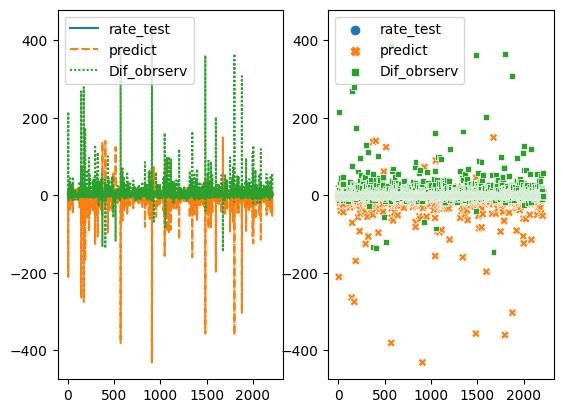

In [839]:
plt.subplot(1,2,1)
sns.lineplot(data=bookrate2_predict3)
plt.subplot(1,2,2)
sns.scatterplot(data=bookrate2_predict3)